c:\Users\Janith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step
Training and Testing Accuracy for each model:
Logistic Regression - Training Accuracy: 99.88%, Testing Accuracy: 100.00%
Naive Bayes - Training Accuracy: 99.82%, Testing Accuracy: 100.00%
Decision Tree - Training Accuracy: 100.00%, Testing Accuracy: 100.00%
Support Vector Machine - Training Accuracy: 99.40%, Testing Accuracy: 99.52%
Random Forest - Training Accuracy: 100.00%, Testing Accuracy: 100.00%
Artificial Neural Network - Training Accuracy: 100.00%, Testing Accuracy: 100.00%


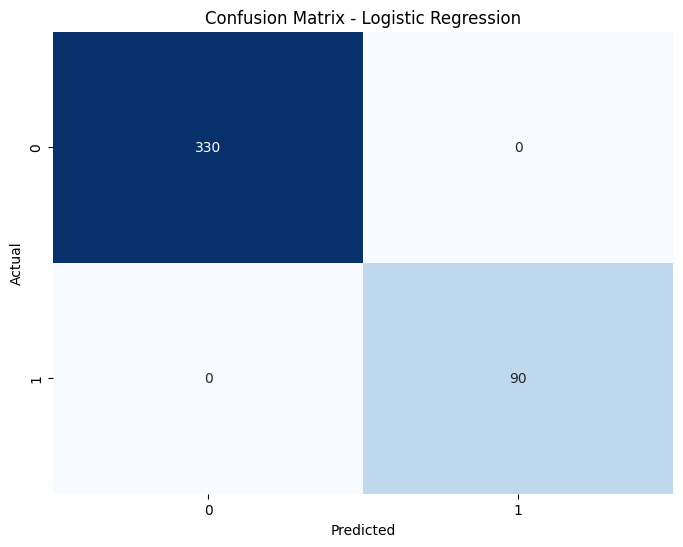

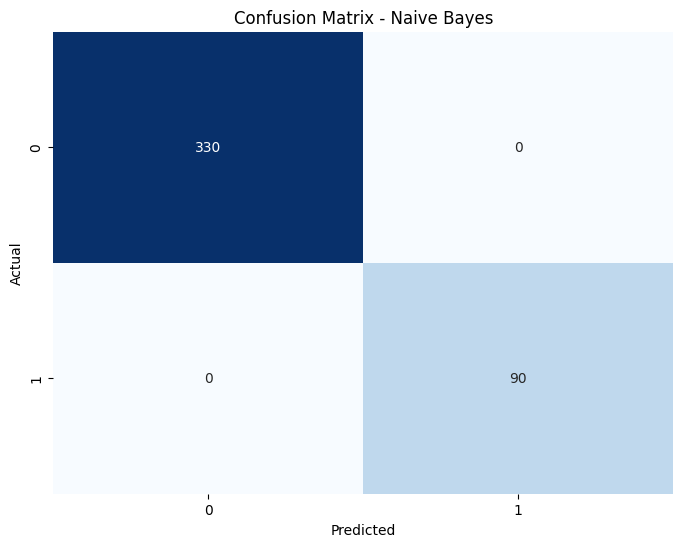

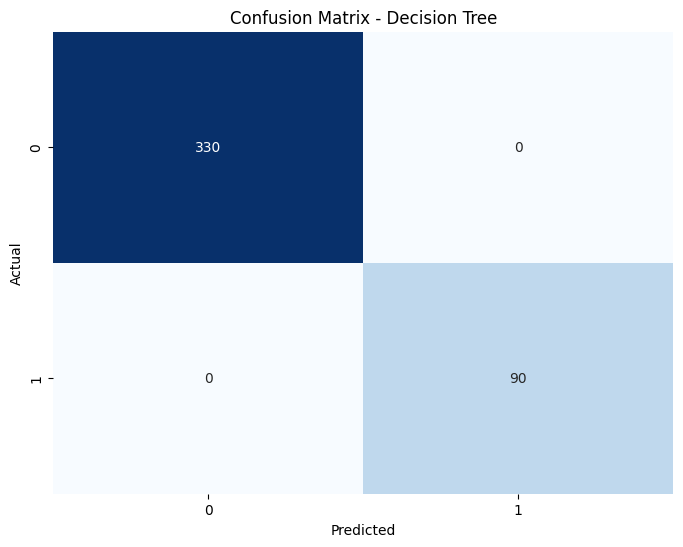

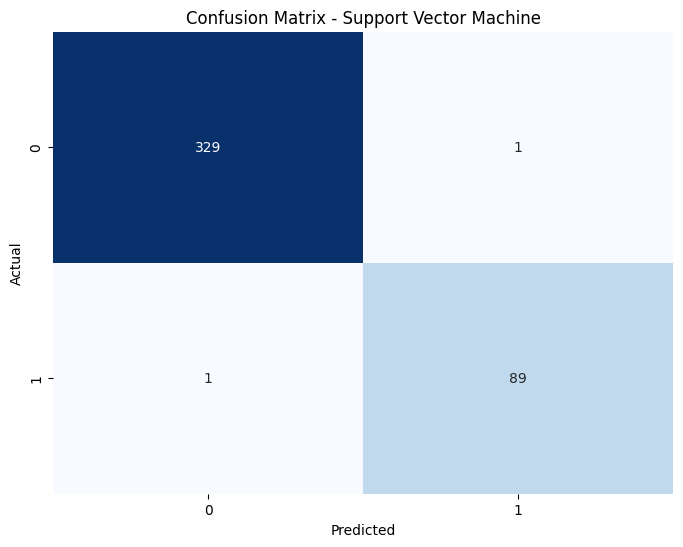

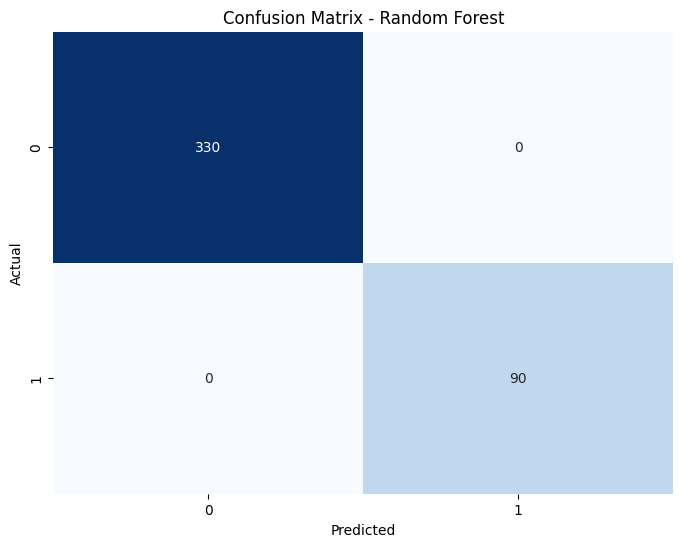

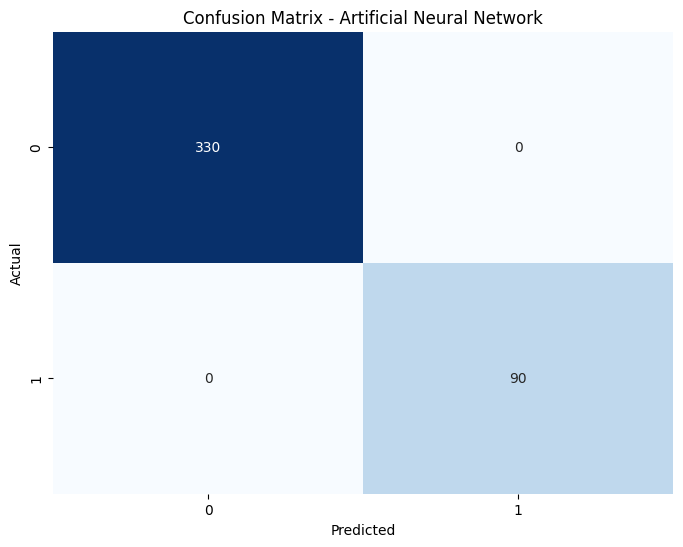

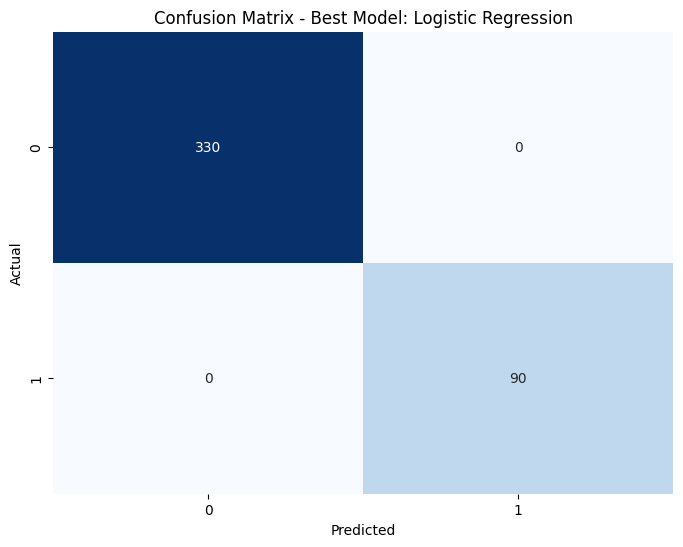

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

# Load the data from the provided CSV file
file_path = 'F:/FYP project/FYP(Flood)/Example Datasets/river_water_levels_flooding_train_data.csv'
df = pd.read_csv(file_path)

# Extract relevant columns
X = df[['Daily Rainfall (mm)', 'Satellite Data Indicator', 'Daily Discharge Rate (cubic meters per second)', 'Hourly Water Level (meters)']]
y = df['Flood Indicator']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Artificial Neural Network': Sequential([
        Dense(64, input_dim=4, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
}

# Compile the Neural Network model
models['Artificial Neural Network'].compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train and evaluate models
results = {}
for model_name, model in models.items():
    if model_name == 'Artificial Neural Network':
        # Train Neural Network
        model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=0)
        y_train_pred = (model.predict(X_train_scaled) > 0.5).astype(int)
        y_test_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
    else:
        # Train other models
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    results[model_name] = {
        'train_accuracy': accuracy_train,
        'test_accuracy': accuracy_test,
        'conf_matrix': confusion_matrix(y_test, y_test_pred),
        'y_test_pred': y_test_pred  # Save predictions
    }

# Select the best model based on test accuracy
best_model_name = max(results, key=lambda k: results[k]['test_accuracy'])
best_model = models[best_model_name]

# Print accuracies of each model
print("Training and Testing Accuracy for each model:")
for model_name, metrics in results.items():
    print(f"{model_name} - Training Accuracy: {metrics['train_accuracy'] * 100:.2f}%, Testing Accuracy: {metrics['test_accuracy'] * 100:.2f}%")

# Plot the confusion matrices for each model
for model_name, metrics in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics['conf_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Final visualization of the best model's confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(results[best_model_name]['conf_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Best Model: {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': results[best_model_name]['y_test_pred'].flatten()
}).reset_index(drop=True)

# Display the first 20 rows of the comparison DataFrame
comparison_df.head(20)


c:\Users\Janith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Janith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step
Training and Testing Accuracy for each model:
Logistic Regression - Training Accuracy: 99.88%, Testing Accuracy: 100.00%
Naive Bayes - Training Accuracy: 99.82%, Testing Accuracy: 100.00%
Decision Tree - Training Accuracy: 100.00%, Testing Accuracy: 100.00%
Support Vector Machine - Training Accuracy: 99.40%, Testing Accuracy: 99.52%
Random Forest - Training Accuracy: 100.00%, Testing Accuracy: 100.00%
MLP - Training Accuracy: 100.00%, Testing Accuracy: 100.00%
RNN - Training Accuracy: 99.76%, Testing Accuracy: 99.52%
LSTM - Training Accuracy: 99.58%, Testing Accuracy: 99.76%


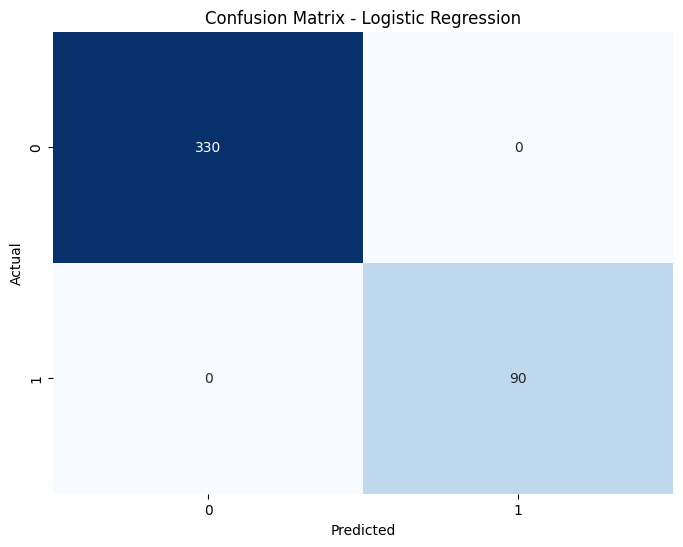

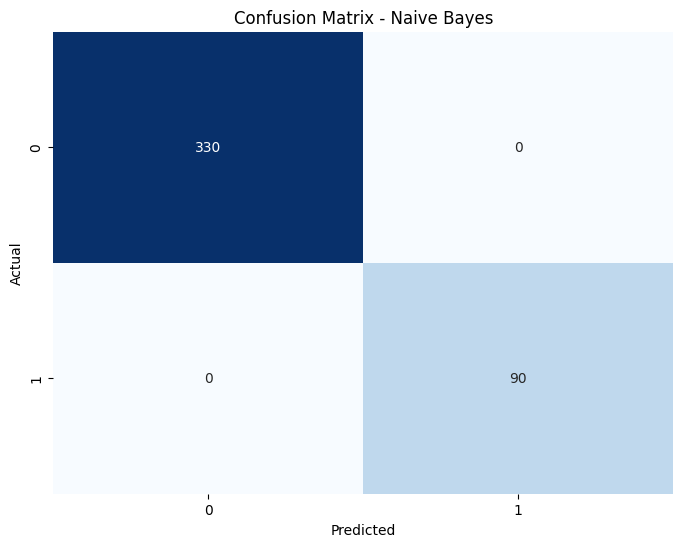

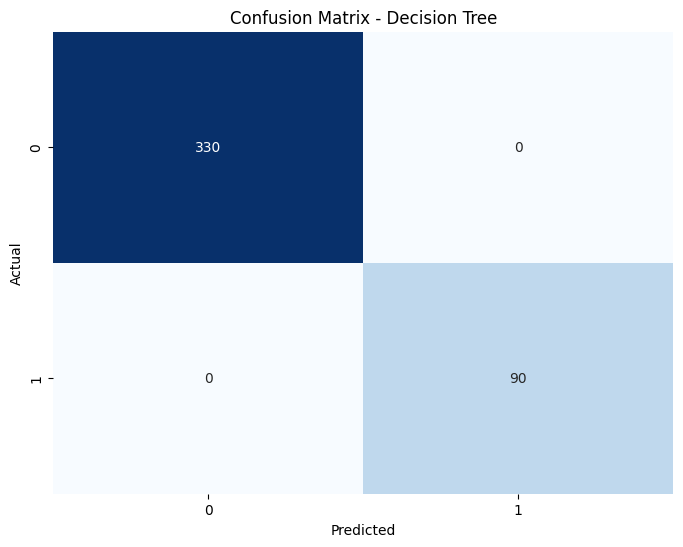

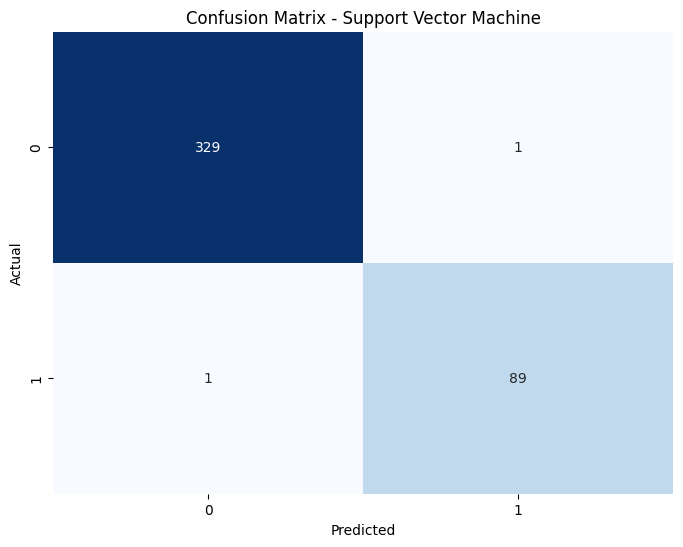

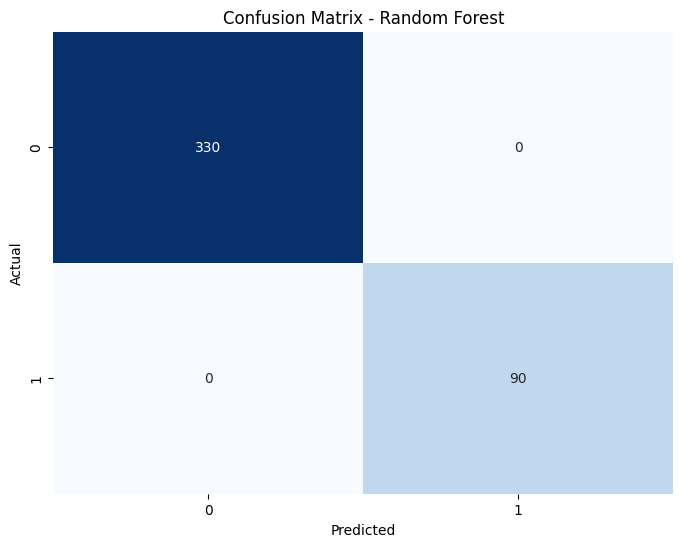

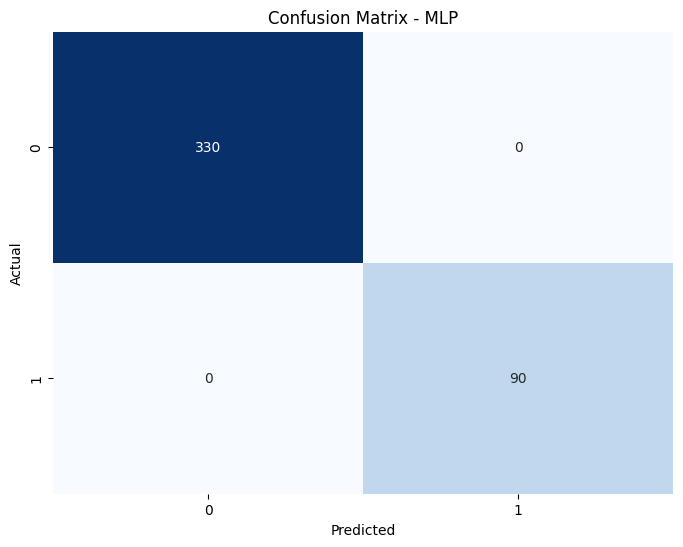

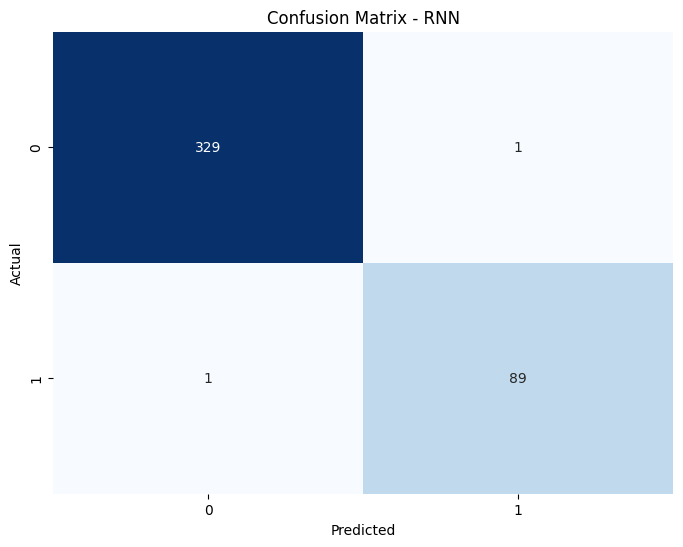

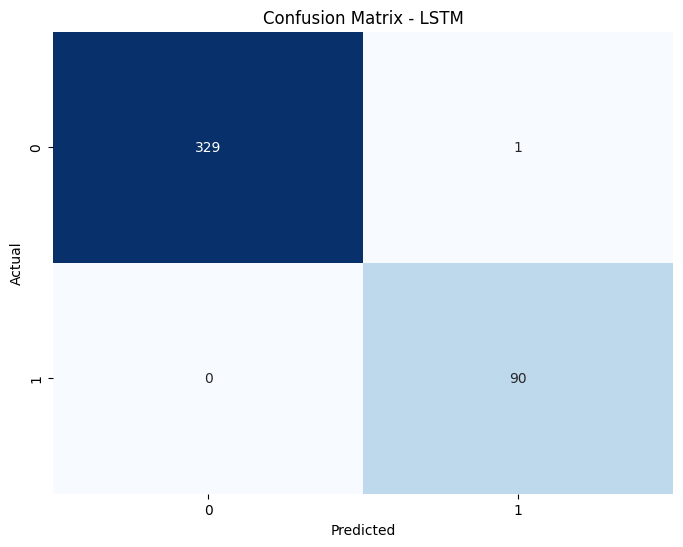

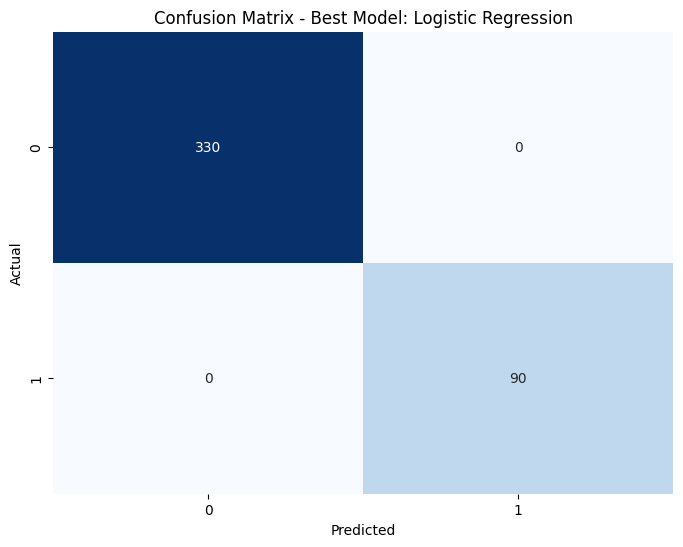

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,1,1
6,0,0
7,0,0
8,0,0
9,0,0


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
import seaborn as sns

# Load the data from the provided CSV file
file_path = 'F:/FYP project/FYP(Flood)/Example Datasets/river_water_levels_flooding_train_data.csv'
df = pd.read_csv(file_path)

# Extract relevant columns
X = df[['Daily Rainfall (mm)', 'Satellite Data Indicator', 'Daily Discharge Rate (cubic meters per second)', 'Hourly Water Level (meters)']]
y = df['Flood Indicator']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for RNN and LSTM
X_train_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machine': SVC(probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'MLP': Sequential([
        Dense(64, input_dim=4, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    'RNN': Sequential([
        SimpleRNN(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    'LSTM': Sequential([
        LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
}

# Compile the neural network models
models['MLP'].compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models['RNN'].compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models['LSTM'].compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train and evaluate models
results = {}
for model_name, model in models.items():
    if model_name in ['MLP', 'RNN', 'LSTM']:
        # Train neural network models
        if model_name == 'MLP':
            model.fit(X_train_scaled, y_train, epochs=50, batch_size=10, verbose=0)
            y_train_pred = (model.predict(X_train_scaled) > 0.5).astype(int)
            y_test_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
        else:
            model.fit(X_train_rnn, y_train, epochs=50, batch_size=10, verbose=0)
            y_train_pred = (model.predict(X_train_rnn) > 0.5).astype(int)
            y_test_pred = (model.predict(X_test_rnn) > 0.5).astype(int)
    else:
        # Train other models
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    results[model_name] = {
        'train_accuracy': accuracy_train,
        'test_accuracy': accuracy_test,
        'conf_matrix': confusion_matrix(y_test, y_test_pred),
        'y_test_pred': y_test_pred  # Save predictions
    }

# Select the best model based on test accuracy
best_model_name = max(results, key=lambda k: results[k]['test_accuracy'])
best_model = models[best_model_name]

# Print accuracies of each model
print("Training and Testing Accuracy for each model:")
for model_name, metrics in results.items():
    print(f"{model_name} - Training Accuracy: {metrics['train_accuracy'] * 100:.2f}%, Testing Accuracy: {metrics['test_accuracy'] * 100:.2f}%")

# Plot the confusion matrices for each model
for model_name, metrics in results.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics['conf_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Final visualization of the best model's confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(results[best_model_name]['conf_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix - Best Model: {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': results[best_model_name]['y_test_pred'].flatten()
}).reset_index(drop=True)

# Display the first 20 rows of the comparison DataFrame
comparison_df.head(20)
